# Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

# Reading and standardizing data

In [2]:
raw_data = pd.read_csv('iris-dataset.csv')
data = raw_data.copy()
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
from sklearn import preprocessing

In [4]:
data_scaled = preprocessing.scale(data)
data_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [5]:
scaled_data = pd.DataFrame(data_scaled, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
scaled_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# Identifying number of clusters

In [6]:
wcss =[]
max_cl = 10
for i in range(1,max_cl):
    kmeans = KMeans(i)
    kmeans.fit(scaled_data)
    wcss_temp = kmeans.inertia_
    wcss.append(wcss_temp)
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.38954350297054,
 91.06480287332292,
 80.20433441381101,
 71.77321199464748,
 63.96098318715491,
 55.47668338778416]

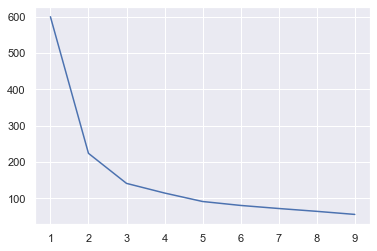

In [7]:
number_cl = range(1,max_cl)
plt.plot(number_cl,wcss)
plt.show()

In [8]:
# Identified number of clusters: 2,3,5

# Clustering (2,3,5 clusters)

In [9]:
kmeans_2 = KMeans(2)
kmeans_2.fit(scaled_data)
clusters_2 = kmeans_2.fit_predict(scaled_data)

kmeans_3 = KMeans(3)
kmeans_3.fit(scaled_data)
clusters_3 = kmeans_3.fit_predict(scaled_data)

kmeans_5 = KMeans(5)
kmeans_5.fit(scaled_data)
clusters_5 = kmeans_5.fit_predict(scaled_data)


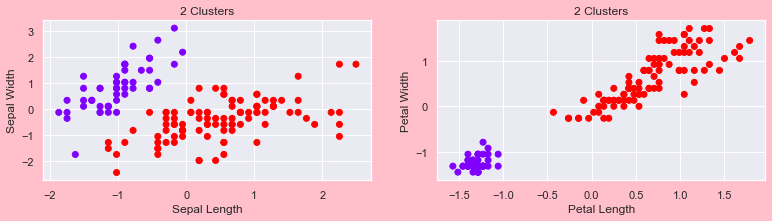

In [10]:
plt.figure(figsize=[20,10],facecolor='pink')

plt.subplot(3,3,1)
plt.scatter(scaled_data['sepal_length'],scaled_data['sepal_width'], c = clusters_2 , cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('2 Clusters')
plt.subplot(3,3,2)
plt.scatter(scaled_data['petal_length'],scaled_data['petal_width'], c = clusters_2 , cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('2 Clusters')


plt.show()



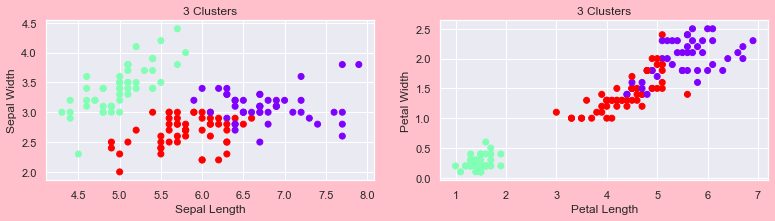

In [11]:
plt.figure(figsize=[20,10],facecolor='pink')
plt.subplot(3,3,4)
plt.scatter(data['sepal_length'],data['sepal_width'], c = clusters_3 , cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('3 Clusters')
plt.subplot(3,3,5)
plt.scatter(data['petal_length'],data['petal_width'], c = clusters_3 , cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('3 Clusters')
plt.show()



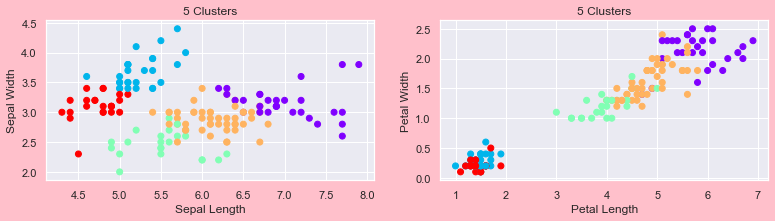

In [12]:
plt.figure(figsize=[20,10],facecolor='pink')
plt.subplot(3,3,7)
plt.scatter(data['sepal_length'],data['sepal_width'], c = clusters_5 , cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('5 Clusters')
plt.subplot(3,3,8)
plt.scatter(data['petal_length'],data['petal_width'], c = clusters_5 , cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('5 Clusters')
plt.show()

# Comparing with real data

In [13]:
real_data = pd.read_csv('iris-with-answers.csv')
real_data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [15]:
real_data['species']= real_data['species'].map({'setosa':0, 'versicolor':2, 'virginica':1})
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


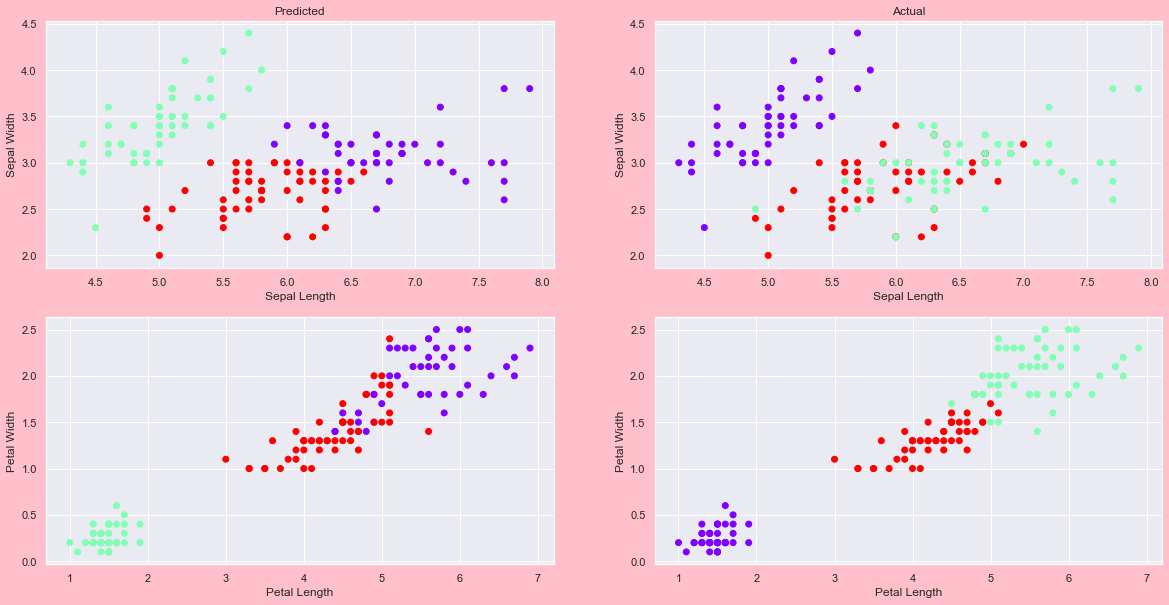

In [16]:
plt.figure(figsize=[20,10],facecolor='pink')

plt.subplot(2,2,2)
plt.scatter(real_data['sepal_length'],real_data['sepal_width'], c = real_data['species'] , cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Actual')

plt.subplot(2,2,1)
plt.scatter(data['sepal_length'],data['sepal_width'], c = clusters_3 , cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Predicted')

plt.subplot(2,2,3)
plt.scatter(data['petal_length'],data['petal_width'], c = clusters_3 , cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


plt.subplot(2,2,4)
plt.scatter(real_data['petal_length'],real_data['petal_width'], c = real_data['species'] , cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


plt.show()